In [1]:
import pandas as pd

In [ ]:
"""
18 Şubat 2016 - 2 Kasım 2018 tarihleri arasındaki zaman diliminde her saat için ölçülmüştür, ancak bazı tarihler eksiktir. Toplamda, her biri 24 ölçüm kaydı içeren 989 tarih bulunmaktadır.

'PRESSURE'  basınç (hPa)
'IGRO'  hava nem oranı (%)
'RAFF_WIND' rüzgar hortum hızı (m/s)
'RAIN' yağış miktarı (mm)
'AIR_TEMPERATURE_CELSIUS' sıcaklık (°C)
'DIRECTION_WIND' rüzgar yönü (°)
'IRRADIANCE_SOLAR'  güneş ışınımı (W/m²)
'VELOCITY_WIND' rüzgar hızı (m/s)
'PV_Power' invertörün enerji üretimi (Wh)
'MODELICA'
'MODELICA_ERROR'
'SHADOW'
"""

In [34]:
df = pd.read_csv("../data/PV_panel_power_with_weather_hour.csv", delimiter=";")
df = df.drop(["MODELICA", 'MODELICA_ERROR', 'SHADOW'], axis=1)
# df = data.copy(deep=True)
df['DATE'] = pd.to_datetime(df['DATE'])

In [3]:
import plotly.express as px

fig = px.line(
    df,
    x='DATE',
    y='PV_Power',
    title="Power Produced Over Years",
    labels={'DATE': 'Date', 'PV_Power': 'Power (Wh)'},
    template='plotly_white'
)

# Customize line color and layout
fig.update_traces(line_color='red')
fig.update_layout(width=1200, height=400)

# Show the plot
fig.show()

In [28]:
from datetime import datetime

df["Year"]= df['DATE'].dt.year
df["Month"]= df['DATE'].dt.month
df["Date_no"]= df['DATE'].dt.day
df["Hour"]= df['DATE'].dt.hour
df['Weekday'] = [datetime.weekday(date) for date in df.DATE]
df['DayOfYear'] = df['DATE'].dt.dayofyear

In [35]:
df['DateOnly'] = df['DATE'].dt.date
daily_data = df.groupby('DateOnly')['PV_Power'].mean().reset_index()
daily_data.columns = ['DateOnly', 'DailyMeanPVPower']

df = pd.merge(df, daily_data, left_on=df['DATE'].dt.date, right_on='DateOnly', how='left')
df

,DateOnly,DATE,PRESSURE,IGRO,RAFF_WIND,RAIN,AIR_TEMPERATURE_CELSIUS,DIRECTION_WIND,IRRADIANCE_SOLAR,VELOCITY_WIND,PV_Power,DateOnly_x,DateOnly_y,DailyMeanPVPower
0,2016-02-18,2016-02-18 00:00:00,951.9,100.0,3.2,0.0,3.0,350.0,0.0,1.0,0,2016-02-18,2016-02-18,2254.666667
1,2016-02-18,2016-02-18 01:00:00,951.9,100.0,3.2,0.0,3.0,350.0,0.0,1.0,0,2016-02-18,2016-02-18,2254.666667
2,2016-02-18,2016-02-18 02:00:00,951.6,100.0,3.1,0.0,3.0,4.0,0.0,1.0,0,2016-02-18,2016-02-18,2254.666667
3,2016-02-18,2016-02-18 03:00:00,951.3,100.0,2.6,0.0,3.0,356.0,0.0,1.0,0,2016-02-18,2016-02-18,2254.666667
4,2016-02-18,2016-02-18 04:00:00,950.8,100.0,2.6,0.0,3.0,17.0,0.0,1.0,0,2016-02-18,2016-02-18,2254.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22987,2018-11-02,2018-11-02 19:00:00,953.8,85.0,4.1,0.0,11.0,240.0,0.0,2.0,0,2018-11-02,2018-11-02,1140.541667
22988,2018-11-02,2018-11-02 20:00:00,954.3,82.0,2.6,0.0,11.0,325.0,0.0,1.0,0,2018-11-02,2018-11-02,1140.541667
22989,2018-11-02,2018-11-02 21:00:00,954.3,86.0,2.8,0.0,11.0,244.0,0.0,1.0,0,2018-11-02,2018-11-02,1140.541667
22990,2018-11-02,2018-11-02 22:00:00,954.5,83.0,4.2,0.0,11.0,223.0,0.0,2.0,0,2018-11-02,2018-11-02,1140.541667


In [6]:
weekly_avg = df.groupby(['Year', 'Month', 'DayOfYear'])[['DailyMeanPVPower']].mean().reset_index()
monthly_avg = df.groupby(['Year', 'Month'])[['DailyMeanPVPower']].mean().reset_index()
yearly_avg = df.groupby(['Year'])[['DailyMeanPVPower']].mean().reset_index()


In [7]:
import plotly.express as px

fig_weekly = px.line(
    weekly_avg,
    x='DayOfYear',
    y='DailyMeanPVPower',
    color='Year',
    title='Weekly Average Daily PV_Power by Year',
    labels={'DailyMeanPVPower': 'Average Daily PV Power', 'DayOfYear': 'Day of Year'}
)
fig_weekly.show()

In [8]:
fig_monthly = px.line(
    monthly_avg,
    x='Month',
    y='DailyMeanPVPower',
    color='Year',
    title='Monthly Average Daily PV_Power by Year',
    labels={'DailyMeanPVPower': 'Average Daily PV Power', 'Month': 'Month'}
)
fig_monthly.show()

In [9]:
fig_yearly = px.bar(
    yearly_avg,
    x='Year',
    y='DailyMeanPVPower',
    title='Yearly Average Daily PV_Power',
    labels={'DailyMeanPVPower': 'Average Daily PV Power', 'Year': 'Year'}
)
fig_yearly.show()

In [10]:
import plotly.express as px

melted_data = df.melt(
    id_vars=['DATE'],
    value_vars=['PV_Power', 'PRESSURE', 'IGRO', 'RAFF_WIND', 'RAIN',
                'AIR_TEMPERATURE_CELSIUS', 'DIRECTION_WIND',
                'IRRADIANCE_SOLAR', 'VELOCITY_WIND'],
    var_name='Feature',
    value_name='Value'
)

fig = px.line(
    melted_data,
    x='DATE',
    y='Value',
    color='Feature',
    facet_row='Feature',
    labels={'Value': 'Value', 'DATE': 'Date'},
    height=1200
)

fig.update_yaxes(matches=None)

fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    title_x=0.5
)

fig.show()

##%%


Output hidden; open in https://colab.research.google.com to view.

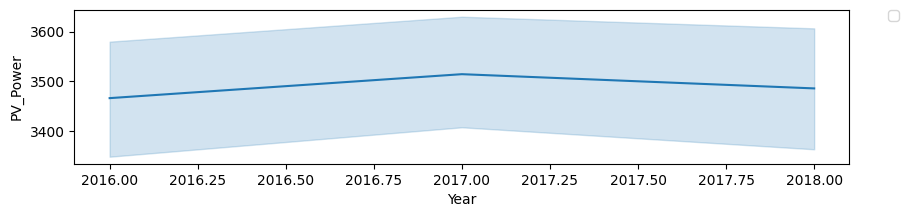

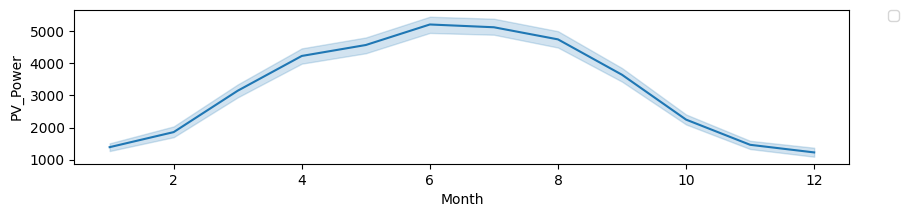

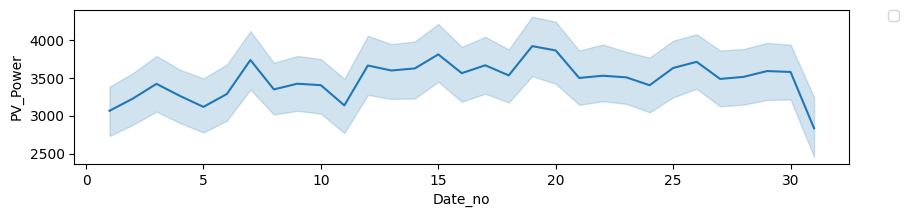

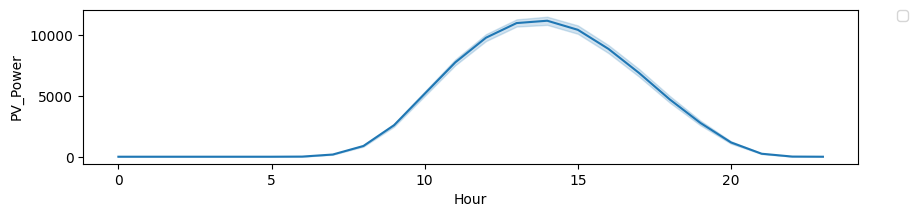

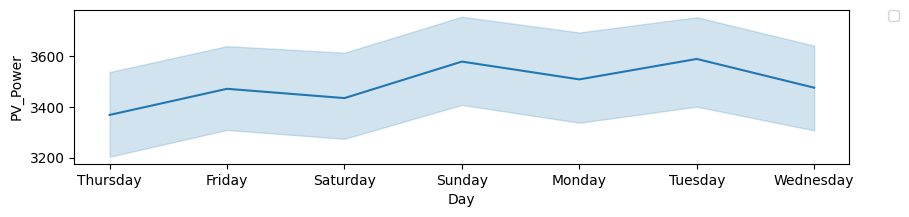

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

new_features = ["Year" ,"Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2))
    ax=sns.lineplot(x=df[i],y="PV_Power",data=df)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

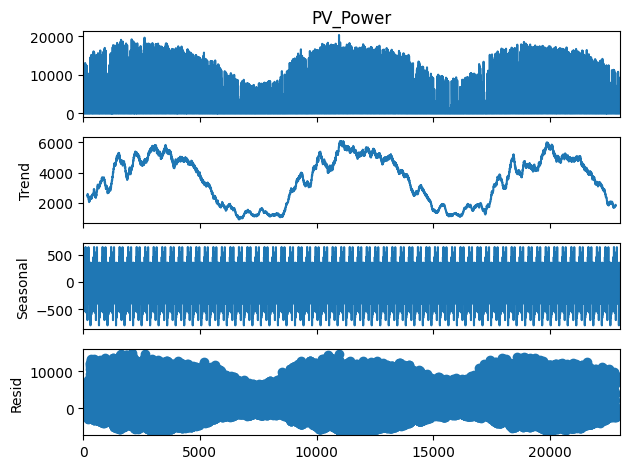

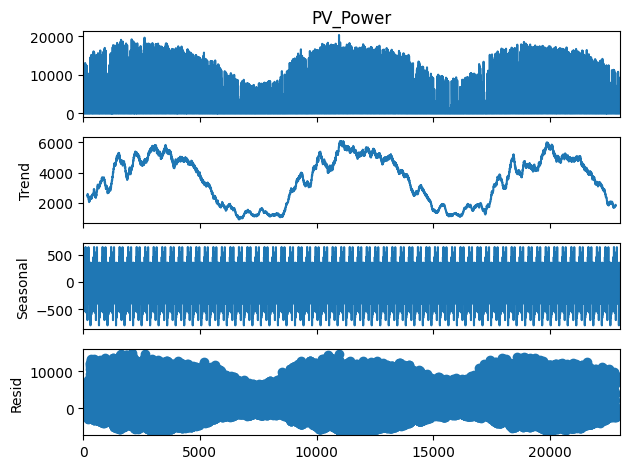

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df['PV_Power'], model='additive', period=365).plot()

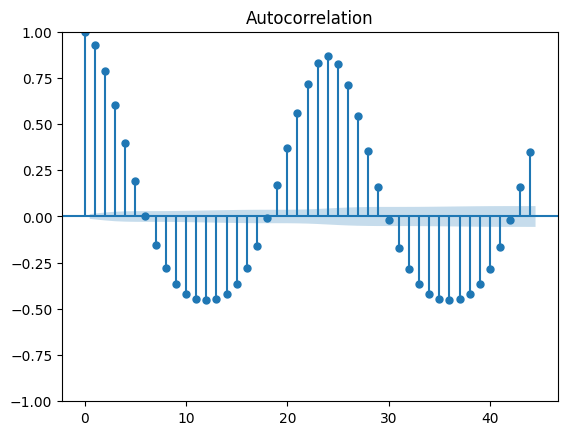

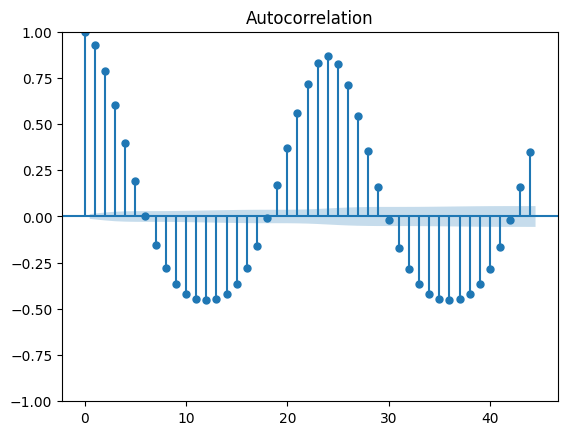

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['PV_Power'])

In [15]:
from statsmodels.tsa.stattools import adfuller

series = df['PV_Power'].dropna()

adf_result = adfuller(series)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

if adf_result[1] < 0.05:
    print("\nSonuç: Seri durağandır (H0 reddedildi).")
else:
    print("\nSonuç: Seri durağan değildir (H0 reddedilemedi).")

ADF Statistic: -7.915211602044551
p-value: 3.852529754688877e-12
Critical Values:
   1%: -3.430635030800888
   5%: -2.8616659744870026
   10%: -2.5668370526224966

Sonuç: Seri durağandır (H0 reddedildi).


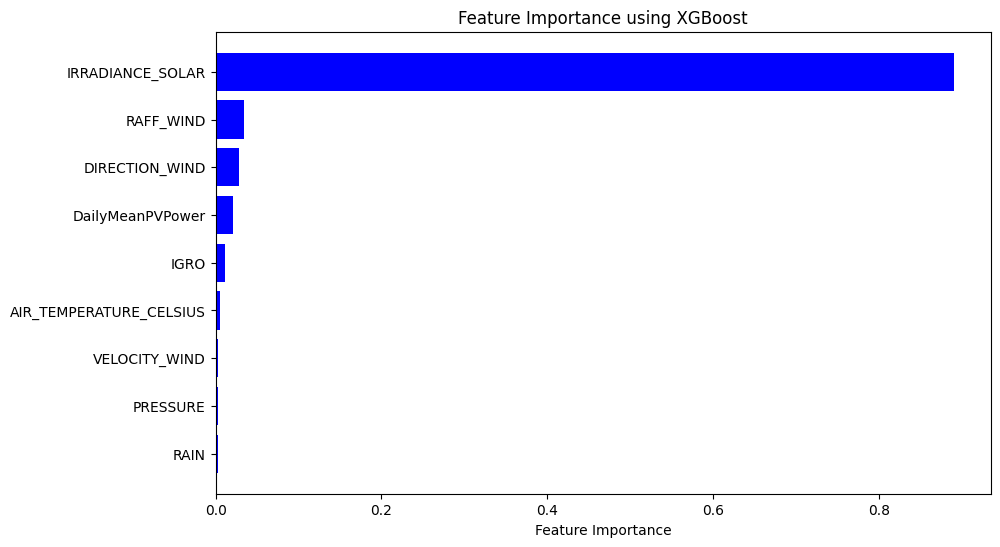

En önemli özellikler:
                   Feature  Importance
6         IRRADIANCE_SOLAR    0.889943
2                RAFF_WIND    0.034261
5           DIRECTION_WIND    0.028680
8         DailyMeanPVPower    0.021387
1                     IGRO    0.010879
4  AIR_TEMPERATURE_CELSIUS    0.005884
7            VELOCITY_WIND    0.003483
0                 PRESSURE    0.002750
3                     RAIN    0.002734


In [37]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

df.set_index('DATE', inplace=True)
X = df.drop('PV_Power', axis=1).drop(['DateOnly_y', 'DateOnly_x', 'DateOnly'], axis=1)  # Bağımsız değişkenler (özellikler)
y = df['PV_Power']  # Hedef değişken (PV_Power)

train_ratio = 0.8
train_size = int(len(df) * train_ratio)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

model.fit(X_train, y_train)

feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Feature Importance')
plt.title('Feature Importance using XGBoost')
plt.gca().invert_yaxis()
plt.show()

print("En önemli özellikler:")
print(importance_df)

In [41]:
data = df.drop(['DateOnly_y', 'DateOnly_x', 'DateOnly'], axis=1)

<Axes: >

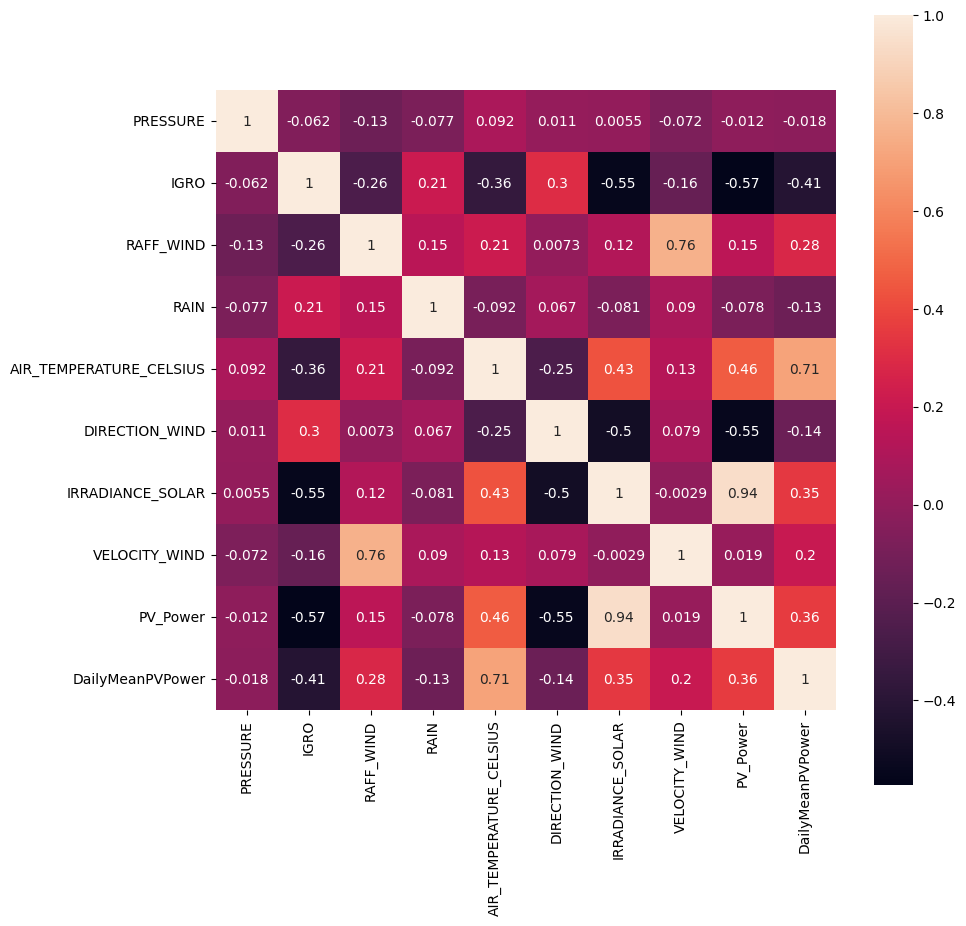

In [42]:
corrmat = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,annot=True,square=True, )

In [43]:
correlation_threshold = 0.1  # Belirli bir eşik değeri (isteğe bağlı değiştirilebilir)
important_features = corrmat['PV_Power'].abs().sort_values(ascending=False)
selected_features_corr = important_features[important_features > correlation_threshold].index.tolist()

print("Korelasyona dayalı olarak seçilen özellikler:")
print(selected_features_corr)

Korelasyona dayalı olarak seçilen özellikler:
['PV_Power', 'IRRADIANCE_SOLAR', 'IGRO', 'DIRECTION_WIND', 'AIR_TEMPERATURE_CELSIUS', 'DailyMeanPVPower', 'RAFF_WIND']
